# Differentiable Histograms

One of the most common data structures in HEP is the **histogram**.

It is a very powerful data reduction and density estimation technique.

Unfortunately it is not differentiable :(. However, through the use
of "soft relaxations" 


In [54]:
import relaxed
import numpy as np
import matplotlib.pyplot as plt

In [141]:
inputs = np.random.normal(1,1, size = 1000)
bins = np.linspace(-10,10,51)
ctrs = bins[:-1] + np.diff(bins)/2
counts_soft_p1 = relaxed.hist(inputs, bandwidth = 0.5, bins = bins)
counts_soft_p2 = relaxed.hist(inputs, bandwidth = 1.0, bins = bins)

counts_hard,_ = np.histogram(inputs, bins = bins)

(-5.0, 5.0)

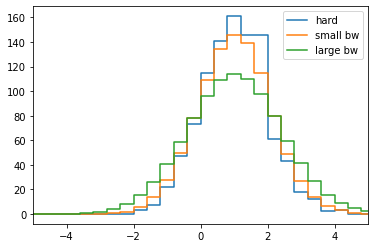

In [166]:
plt.step(ctrs,counts_hard, label = 'hard', where = 'mid')
plt.step(ctrs,counts_soft_p1, label = 'small bw', where = 'mid')
plt.step(ctrs,counts_soft_p2, label = 'large bw', where = 'mid')
plt.legend()
plt.xlim(-5,5)

# Optimizing through histogramming



In [178]:
def shift_histo(factor, inputs):
    shifted_inputs = factor+inputs
#     soft_counts,_ = jax.numpy.histogram(shifted_inputs, bins = bins)
    soft_counts = relaxed.hist(shifted_inputs, bandwidth = 0.5, bins = bins)
    binned_mean = np.sum(ctrs*soft_counts/len(shifted_inputs))
    return binned_mean

def loss(param,target,inputs):
    binned_mean = shift_histo(param,inputs)
    loss = (binned_mean-target)**2
    return loss

0.03999973 3.9311848


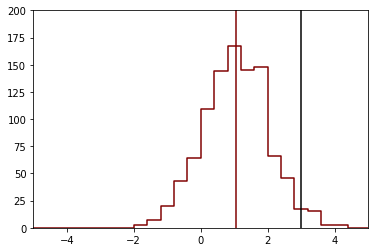

0.43591845 2.5147543


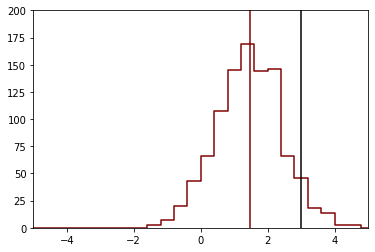

0.8117384 1.4571605


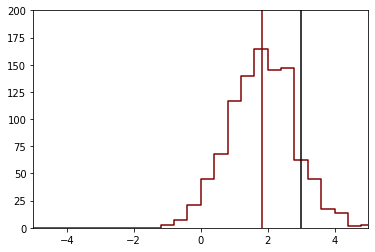

1.149197 0.7483471


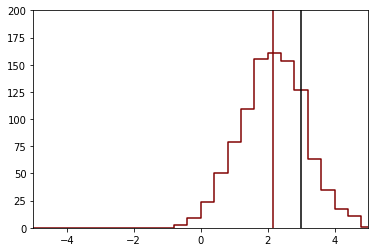

1.4330812 0.3309742


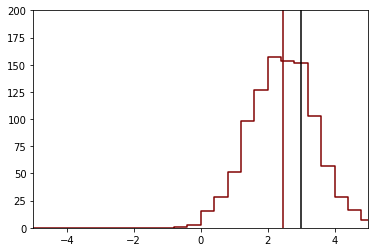

1.6544365 0.120766416


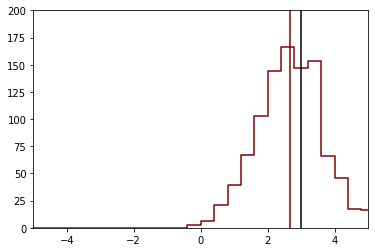

1.8122631 0.03367927


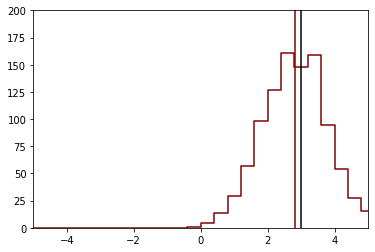

1.9131514 0.0059920102


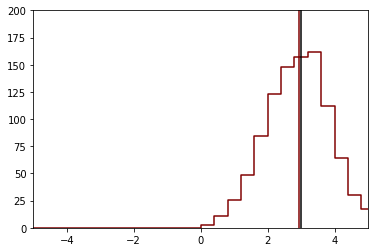

1.9689454 0.00031398094


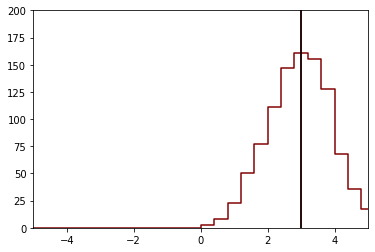

1.9934194 8.6091226e-05


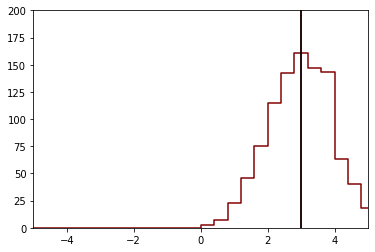

In [179]:
import jax
import optax
opt = optax.adam(4e-2)
params = 0.0
state = opt.init(params)
target = 3.0

for i in range(100):
    lvalue,g = jax.value_and_grad(loss)(params,target,inputs)
    updates,state = opt.update(g,state)
    params = optax.apply_updates(params,updates)
    if i % 10 == 0:
        print(params,lvalue)
        
        hard_hist = np.histogram(params+inputs,bins = bins)[0]
        hard_mean = np.sum(ctrs*hard_hist/len(inputs))        
        plt.step(ctrs,hard_hist, where = 'mid', color = 'maroon')
        plt.xlim(-5,5)
        plt.ylim(0,200)
        plt.vlines(hard_mean,0,200, colors = 'maroon')
        plt.vlines(target,0,200, colors = 'k')
        plt.show()